In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20.0,10.0)

data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Traditional Approach:

In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

Calculating Slope and C:

In [4]:
meanx=np.mean(X)
meany=np.mean(Y)

n=len(X)

numer=0
denom=0
for i in range(n):
    numer+=(X[i]-meanx)*(Y[i]-meany)
    denom+=(X[i]-meanx)**2
b1=numer/denom
b0=meany-(b1*meanx)

print(b1,b0)

0.26342933948939945 325.57342104944223


The equation now is y=b1x+b0:

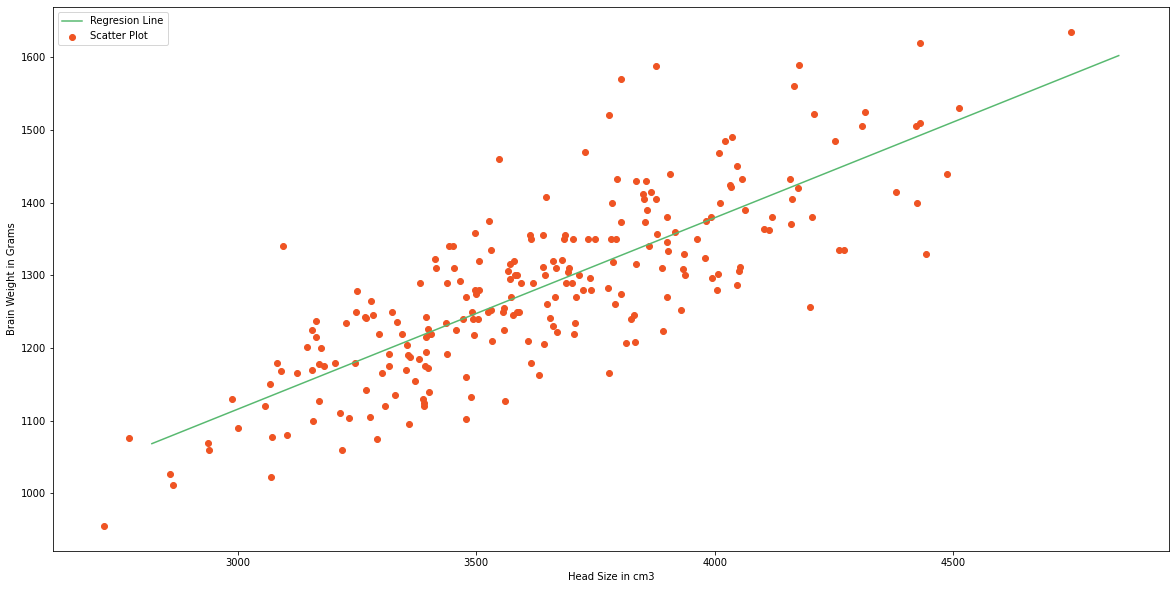

In [5]:
max_x=np.max(X)+100
min_x=np.min(X)+100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='#58b970',label='Regresion Line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in Grams')
plt.legend()
plt.show()

R2 Method, Traditional Way:

In [10]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-meany)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


Modern Way:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Canot Use Rank 1 Matrix in Sklearn
X=X.reshape((n,1))
#Creating Model
reg=LinearRegression()
#Fitting Training Data
reg.fit(X,Y)
#Yprediction
Y_pred=reg.predict(X)
#Calculating R2 Score

r2score=reg.score(X,Y)

print(r2score)

0.639311719957
